Reminder: when running this notebook use conda activate my-rdkit-env in miniconda

# RDKIT overview

# major types of moleculer file formats
* SMILES -- plain text (string) [more description ](http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)
* sdf    -- plain text (acom coordinates)

## SMILES

Simplest way to reflect a molecule:
* atoms of chemical elements are represented by chemical symbols in capital letter, hydrogen is usually ignored. 
* bonds :
    * single bonds are not displayed 
    * for double '=' symbol
    * for triple '#' symbol
    * for quadruple '$' symbol 
* atoms that are bonded must stand nearby.
Ring structures are written by breaking each ring at an arbitrary point (although some choices will lead to a more legible SMILES than others) to make a 'straight non-ring' structure (as if it wasn't a ring) and adding numerical ring closure labels to show connectivity between non-adjacent atoms.
* aromacity is commonly illustrated by writing the constituent B, C, N, O, P and S atoms in lower-case forms b, c, n, o, p and s, respectively.
* for side chains representation of atomic gpoups branches are used.

pro :
* easy to write
* easy to store

cons:
* (usually) does not have a 3D information
* one molecule could have multiple (!) smiles

# importing data to RDKIT

rdkit have it's inner molecular data representation object (called mol object)

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit import DataStructs
import numpy as np

In [2]:
data = pd.read_csv("./synthesizable.csv")#,index_col=0)
data.head()

,SMILES_STD,score
0,C1CC1,0.981239
1,C1CCC1,0.981239
2,C1COC1,0.992956
3,CC(=O)O,1.000000
4,CS(N)(=O)=O,0.959105


In [3]:
my_one_smile_string = data["SMILES_STD"][1000]

In [4]:
my_one_smile_string

'CC(=O)N(C)c1cccs1'

In [5]:
my_one_mol_object = Chem.MolFromSmiles(my_one_smile_string,sanitize=True)

In [6]:
type(my_one_mol_object)

rdkit.Chem.rdchem.Mol

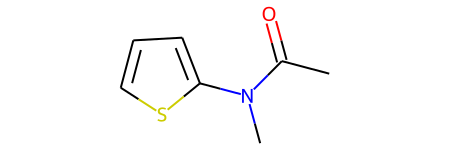

In [7]:
my_one_mol_object

In [8]:
Chem.MolToSmiles(my_one_mol_object)

'CC(=O)N(C)c1cccs1'

In [9]:
Chem.MolToInchiKey(my_one_mol_object)

'VOZFTRNENOJFTL-UHFFFAOYSA-N'

In [10]:
my_one_mol_object.GetNumAtoms()

10

In [11]:
# Molecule representation
#https://en.wikipedia.org/wiki/Chemical_table_file#Extended_Connection_Table_(V3000)
print(Chem.MolToMolBlock(my_one_mol_object))


     RDKit          2D

 10 10  0  0  0  0  0  0  0  0999 V2000
    5.0260    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5260    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7760    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.7760    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.5260   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2760    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943    1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943   -1.2135    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  2  4  1  0
  4  5  1  0
  4  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  9 10  1  0
 10  6  1  0
M  END



In [12]:
from rdkit.Chem import AllChem
my_one_mol_object_3D = Chem.AddHs(my_one_mol_object) # by default rdkit's mol object does not store H's
AllChem.EmbedMolecule(my_one_mol_object_3D)

0

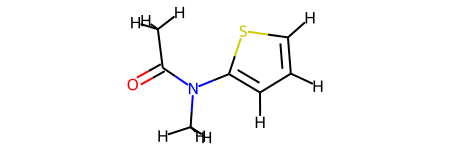

In [13]:
my_one_mol_object_3D

In [14]:
print(Chem.MolToMolBlock(my_one_mol_object_3D))


     RDKit          3D

 19 19  0  0  0  0  0  0  0  0999 V2000
   -2.1080    1.6626    0.0224 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9248    0.2194    0.0469 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0483   -0.4103    0.0613 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7815   -0.5604    0.0569 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8799   -2.0074    0.0577 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5562   -0.0197    0.0629 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7221   -0.7093    0.1843 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8767   -0.0029    0.1681 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7692    1.3554    0.0295 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0930    1.5921   -0.0710 S   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5563    1.9846    1.0096 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2914    2.2896   -0.2978 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9427    1.9093   -0.7063 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9216   -2.3432    0

## write molecule to sdf file

In [15]:
w = Chem.SDWriter('./my_one_mol_object_3D.sdf')
w.write(my_one_mol_object_3D)
w.close()

In [16]:
#Works only on Linux, just viewing plain text file my_one_mol_object_3D.sdf

In [17]:
%%bash
less ./my_one_mol_object_3D.sdf


     RDKit          3D

 19 19  0  0  0  0  0  0  0  0999 V2000
   -2.1080    1.6626    0.0224 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9248    0.2194    0.0469 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0483   -0.4103    0.0613 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7815   -0.5604    0.0569 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8799   -2.0074    0.0577 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5562   -0.0197    0.0629 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7221   -0.7093    0.1843 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8767   -0.0029    0.1681 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7692    1.3554    0.0295 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0930    1.5921   -0.0710 S   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5563    1.9846    1.0096 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2914    2.2896   -0.2978 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9427    1.9093   -0.7063 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9216   -2.3432    0

# working with pandas dataframe

You could work with help of PandasTools module (easy to use, good for "small" data).
Or you could do everything on yourown (good when trying to deal with "big" data (like more than 100K molecules))

In [18]:
data_small = data.tail(100).copy()

In [19]:
data_small.head()

,SMILES_STD,score
187001,C(=C1COC1)c1c[nH]c(N2CCN(c3ccccc3)CC2)c1,0.829134
187002,C(=C1COC1)c1c[nH]cc1N1CCN(c2ccccc2)CC1,0.840006
187003,C(=C1COC1)c1cc[nH]c1N1CCN(c2ccccc2)CC1,0.943879
187004,C(=C1COC1)c1c[nH]c(-c2ccccc2N2CCNCC2)c1,0.663137
187005,C(=C1COC1)c1cc[nH]c1-c1ccccc1N1CCNCC1,0.830505


In [20]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(data_small, 'SMILES_STD','ROMol')

,SMILES_STD,score,ROMol
187001,C(=C1COC1)c1c[nH]c(N2CCN(c3ccccc3)CC2)c1,0.829134,
187002,C(=C1COC1)c1c[nH]cc1N1CCN(c2ccccc2)CC1,0.840006,
187003,C(=C1COC1)c1cc[nH]c1N1CCN(c2ccccc2)CC1,0.943879,
187004,C(=C1COC1)c1c[nH]c(-c2ccccc2N2CCNCC2)c1,0.663137,
187005,C(=C1COC1)c1cc[nH]c1-c1ccccc1N1CCNCC1,0.830505,

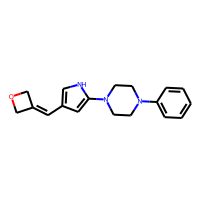
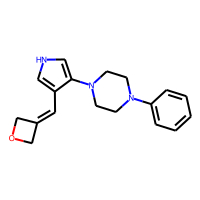
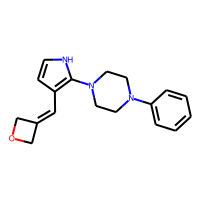
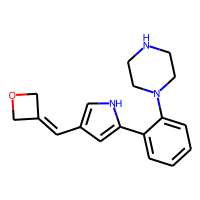
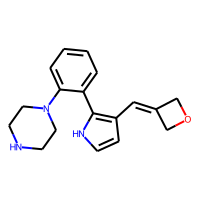

In [21]:
data_small.head()

**important to know** ROMol is not a column with pictures, its column with Mol Objects, represented as pictures

In [22]:
# manual way
data_small["MolObj"] = data_small['SMILES_STD'].map(lambda x: Chem.MolFromSmiles(x))

,SMILES_STD,score,ROMol,MolObj
187001,C(=C1COC1)c1c[nH]c(N2CCN(c3ccccc3)CC2)c1,0.829134,,
187002,C(=C1COC1)c1c[nH]cc1N1CCN(c2ccccc2)CC1,0.840006,,
187003,C(=C1COC1)c1cc[nH]c1N1CCN(c2ccccc2)CC1,0.943879,,
187004,C(=C1COC1)c1c[nH]c(-c2ccccc2N2CCNCC2)c1,0.663137,,
187005,C(=C1COC1)c1cc[nH]c1-c1ccccc1N1CCNCC1,0.830505,,

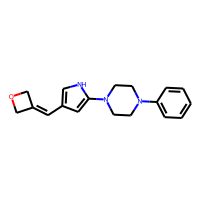
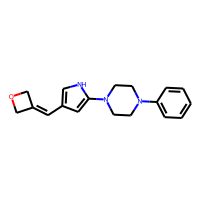
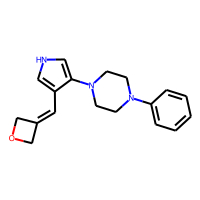
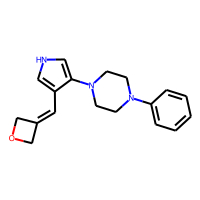
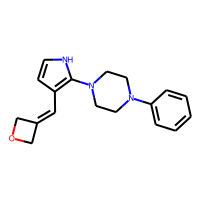
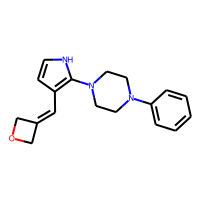
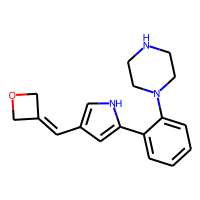
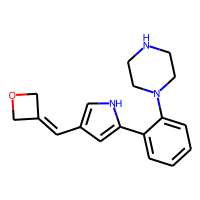
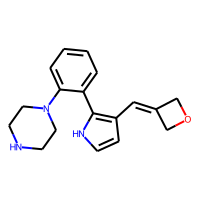
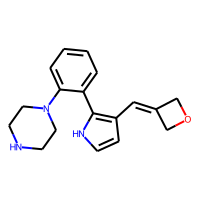

In [23]:
data_small.head()

why do we need manual way? Store Mol Objects **in memory could be hard**. so sometimes its useful to perform calculation of interest **on the fly**

In [24]:
# example of cacluclating n_atoms without storing MolObjects
data_small["n_Atoms"] = data_small['SMILES_STD'].map(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())

,SMILES_STD,score,ROMol,MolObj,n_Atoms
187001,C(=C1COC1)c1c[nH]c(N2CCN(c3ccccc3)CC2)c1,0.829134,,,22
187002,C(=C1COC1)c1c[nH]cc1N1CCN(c2ccccc2)CC1,0.840006,,,22
187003,C(=C1COC1)c1cc[nH]c1N1CCN(c2ccccc2)CC1,0.943879,,,22
187004,C(=C1COC1)c1c[nH]c(-c2ccccc2N2CCNCC2)c1,0.663137,,,22
187005,C(=C1COC1)c1cc[nH]c1-c1ccccc1N1CCNCC1,0.830505,,,22
187006,C(=C1COC1)c1c[nH]c(-c2cccc(N3CCNCC3)c2)c1,0.804411,,,22
187007,C(=C1COC1)c1cc[nH]c1-c1cccc(N2CCNCC2)c1,0.916351,,,22
187008,O=C(NC1CC1)C1CC1c1cccc(CN2CCNCC2)c1,0.956031,,,22
187009,O=C(NC1CC1)C1CC1c1ccc(CN2CCNCC2)cc1,0.963374,,,22
187010,O=C(NC1CC1)C1CC1c1ccccc1CN1CCNCC1,0.673465,,,22

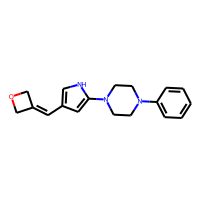
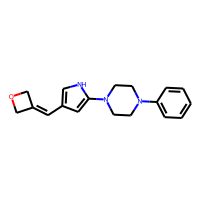
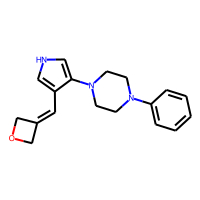
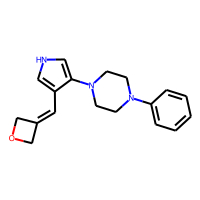
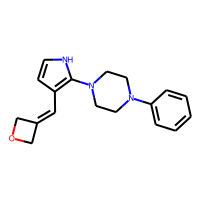
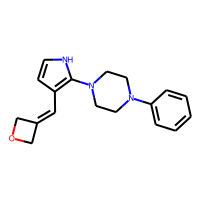
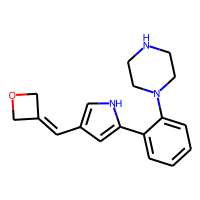
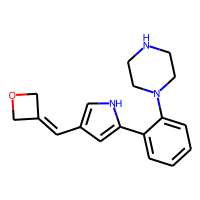
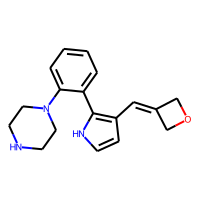
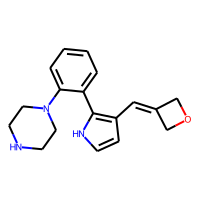
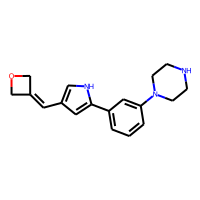
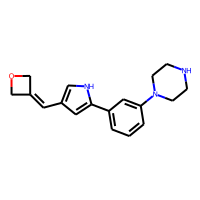
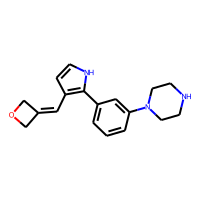
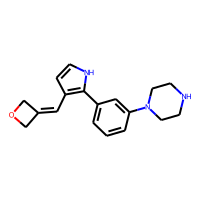
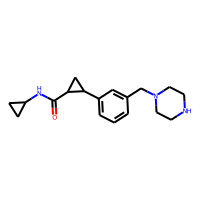
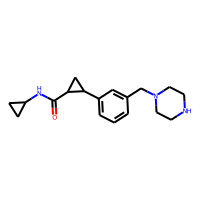
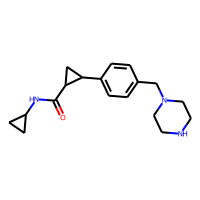
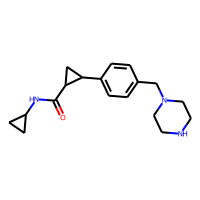
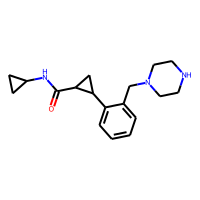
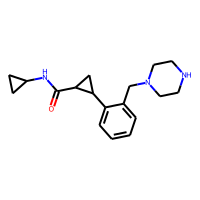
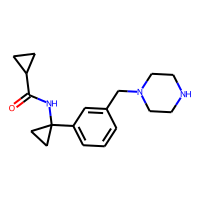
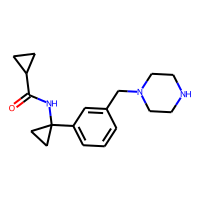
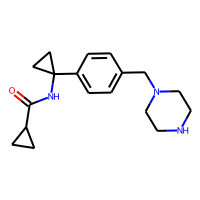
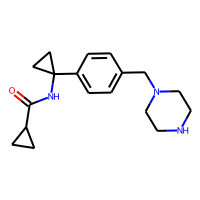
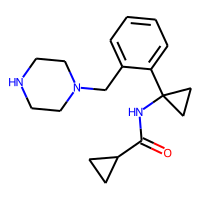
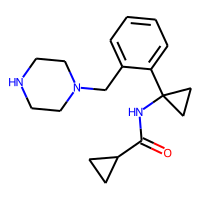
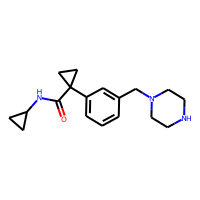
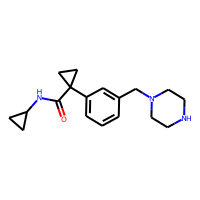
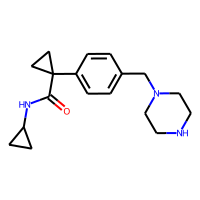
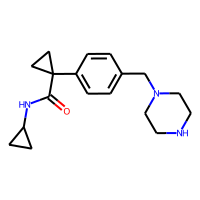
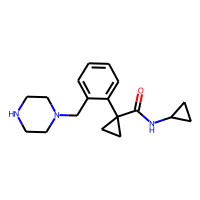
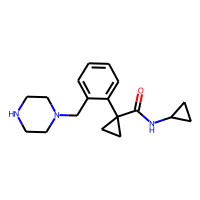
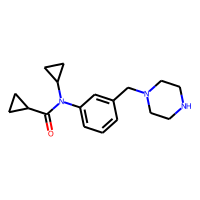
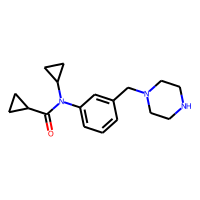
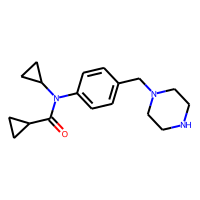
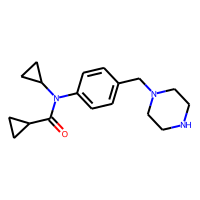
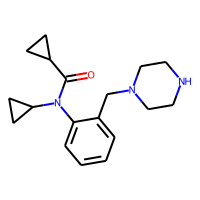
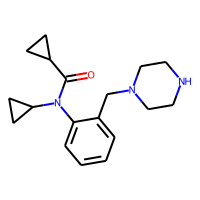
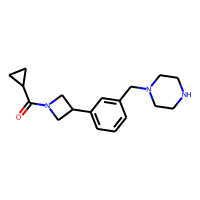
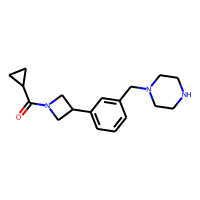

In [27]:
data_small.head(20)

## Drawing a mol grid

/home/eleni/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


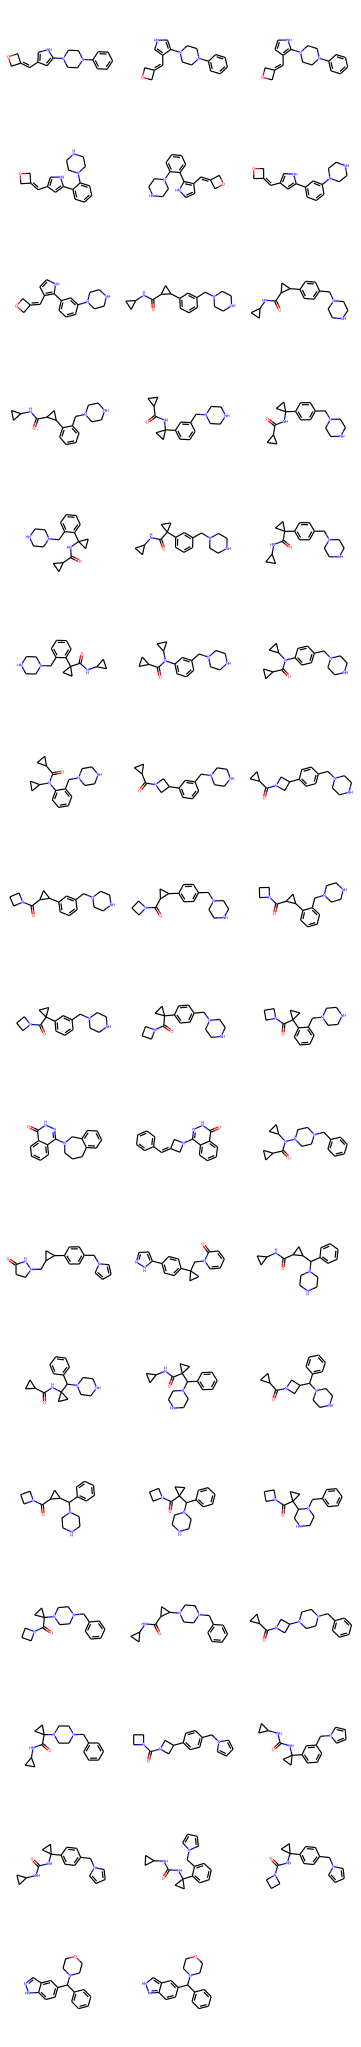

In [26]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(list(data_small.ROMol), useSVG=True)

# Molecular fingerprints

![img](./fp_list.png)

In [28]:
my_this_mol_obj = data_small["ROMol"][187013]
my_that_mol_obj = data_small["ROMol"][187020]

In [29]:
this_fp = Chem.RDKFingerprint(my_this_mol_obj,maxPath=7,fpSize=512)
that_fp = Chem.RDKFingerprint(my_that_mol_obj,maxPath=7,fpSize=512)

In [30]:
this_fp

In [31]:
that_fp.ToBitString()

'11111110111100101110101111011101100110011110011001011100000000111001111101101101011100010110011100110001100110001110011011110010111011000011111101011111110101111111101010011101011111101000100111111101111111110111001010110100100101011011111111110111110111111110001111001111101111111111111010110010011111100011010111101111101111011111110111000111011100001111010110011011000111101010011111100111111111110101111011111101111111010011101011010001111111101110101111000111111110111010101101101111101010110110010111111001'

In [32]:
import numpy as np
np.array(that_fp)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,

In more details see this illustration from OpenEye documentation
![pathfp](./PathEnumeration.png)

In [33]:
# Morgan FP
MFP_this = AllChem.GetMorganFingerprint(my_this_mol_obj,2)
MFP_this

 In more details see this illustration from OpenEye documentation
![pathfp](./CircularEnumeration.png)

In [34]:
MFP_this_bits = AllChem.GetMorganFingerprintAsBitVect(my_this_mol_obj,5,nBits=512)
MFP_this_bits

In [35]:
MFP_this_bits.ToBitString()

'11000001000001000000000000000000000010000000000000000000001001001000000000001000100000000010000001000000000000000000000000000000100000000010000000000100000100000000000100000001010100000000000001000000000000000000001000000000000001000000000000000000000100111000000000000000100000000000100000000001000001000100100000000000000001000000100101000000100000000000100000000000010000000000010100100000000000000000000010000010100000010000000001101000000111000000001011000010100000010000000000001000000010100001000001010000'

In [36]:
DataStructs.DiceSimilarity(this_fp,this_fp)

1.0

In [37]:
DataStructs.DiceSimilarity(this_fp,that_fp)

0.800531914893617

In [38]:
DataStructs.DiceSimilarity(this_fp,MFP_this_bits)

0.2330508474576271

## what does the bit means

In [44]:
data_small["SMILES_STD"][187020]

'O=C(C1CC1)N1CC(c2cccc(CN3CCNCC3)c2)C1'

In [57]:
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi,nBits=512)

mfp2_svg = Draw.DrawMorganBit(mol, 29, bi, useSVG=True)
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi,fpSize=512)
rdk_svg = Draw.DrawRDKitBit(mol, 2, rdkbi, useSVG=True)

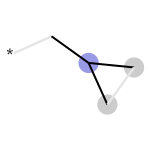

In [52]:
mfp2_svg

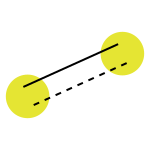

In [58]:
rdk_svg

## Molecular similarity

## Dice similarity

![dice](./dice_sim.png)

## Tanimoto similarity 

![tani](./jacard_sim.jpg)

In [60]:
from rdkit import DataStructs
# Tanimoto
commonBits = this_fp&that_fp
print('this:',this_fp.GetNumOnBits(),'that:',that_fp.GetNumOnBits(),'num in common:',commonBits.GetNumOnBits())
print(commonBits.GetNumOnBits()/(this_fp.GetNumOnBits()+that_fp.GetNumOnBits()-commonBits.GetNumOnBits()))
print('Tanimoto:', DataStructs.TanimotoSimilarity(this_fp,that_fp))

this: 407 that: 345 num in common: 301
0.6674057649667405
Tanimoto: 0.6674057649667405


In [61]:
#%%bash
#pip3 install sklearn
#pip3 install -U scikit-learn scipy matplotlib

In [62]:
import sklearn
from sklearn.metrics import jaccard_score

In [63]:
jaccard_score(np.array(this_fp),np.array(that_fp))

0.6674057649667405

## molecular similarity visualization 

In [64]:
from rdkit.Chem.Draw import SimilarityMaps


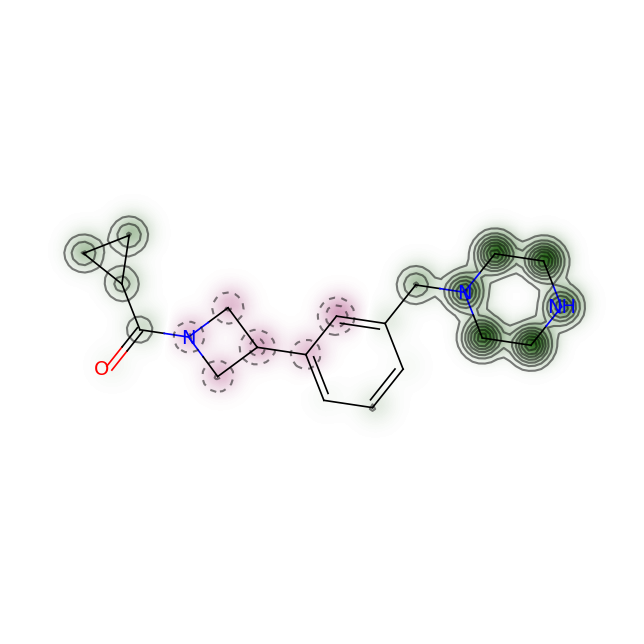

In [65]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(my_this_mol_obj,my_that_mol_obj, SimilarityMaps.GetMorganFingerprint)


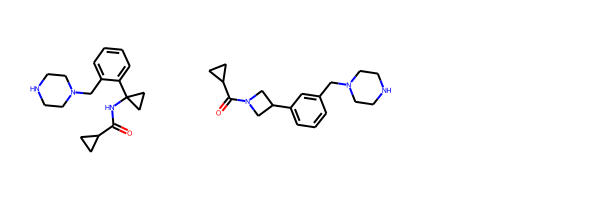

In [66]:
Draw.MolsToGridImage([my_this_mol_obj,my_that_mol_obj])

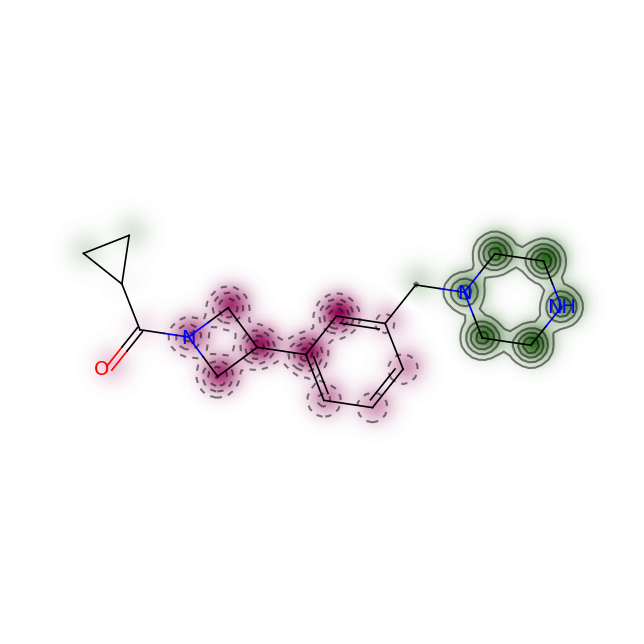

In [67]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(my_this_mol_obj, my_that_mol_obj,
                                                               lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=5, fpType='bv'),
                                                               metric=DataStructs.TanimotoSimilarity)


## On a bigger scale with pandas dataframe 

In [75]:
def SMI2FD(smiles_str,mP=7,fS=1024):
    fp = Chem.RDKFingerprint(Chem.MolFromSmiles(smiles_str),maxPath=mP,fpSize=fS)
    return np.array(fp)
data_small["RDKFP"]=data_small["SMILES_STD"].apply(SMI2FD)

,SMILES_STD,score,ROMol,MolObj,n_Atoms,RDKFP,Tanimoto_sim_toFirst
187001,C(=C1COC1)c1c[nH]c(N2CCN(c3ccccc3)CC2)c1,0.829134,,,22,"[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.350854

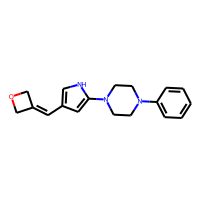
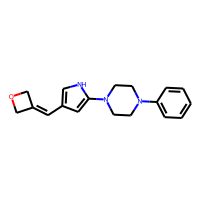

In [76]:
data_small.head(1)

In [77]:
first_fp = data_small["RDKFP"][187061]

In [78]:
data_small["Tanimoto_sim_toFirst"]=data_small["RDKFP"].apply(lambda x: jaccard_score(x,first_fp))

,SMILES_STD,score,ROMol,MolObj,n_Atoms,RDKFP,Tanimoto_sim_toFirst
187061,c1ccc(C(c2cccc3cn[nH]c23)N2CCOCC2)cc1,1.000000,,,22,"[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...",1.000000
187062,c1ccc(C(c2cccc3c[nH]nc23)N2CCOCC2)cc1,1.000000,,,22,"[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...",1.000000
187050,c1ccc(C(c2ccc3n[nH]cc3c2)N2CCOCC2)cc1,0.999976,,,22,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...",0.767695
187049,c1ccc(C(c2ccc3[nH]ncc3c2)N2CCOCC2)cc1,0.999937,,,22,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...",0.767695
187052,c1ccc(C(c2cccc3n[nH]cc23)N2CCOCC2)cc1,0.999997,,,22,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",0.694309
187051,c1ccc(C(c2cccc3[nH]ncc23)N2CCOCC2)cc1,0.999996,,,22,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",0.694309
187055,c1ccc(C(c2ccc3c[nH]nc3c2)N2CCOCC2)cc1,0.999988,,,22,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",0.680272
187054,c1ccc(C(c2ccc3cn[nH]c3c2)N2CCOCC2)cc1,0.999962,,,22,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",0.680272
187066,c1ccc(C(c2n[nH]c3ccccc23)N2CCOCC2)cc1,0.999367,,,22,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ...",0.637518
187067,c1ccc(C(c2[nH]nc3ccccc23)N2CCOCC2)cc1,0.996788,,,22,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, ...",0.637518

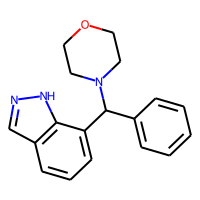
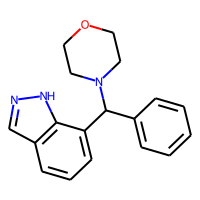
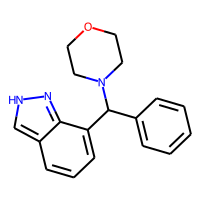
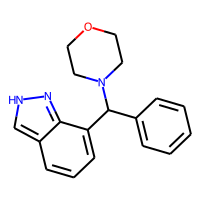
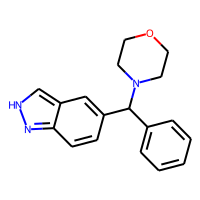
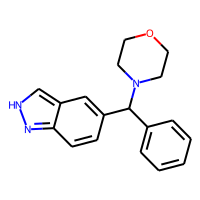
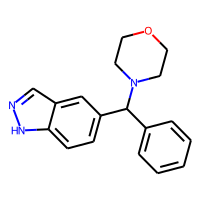
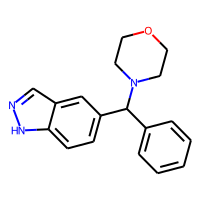
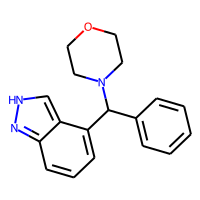
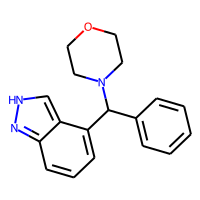
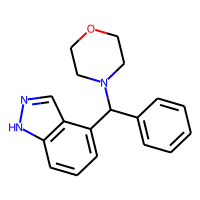
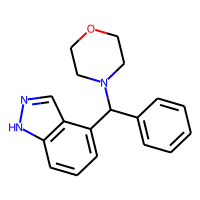
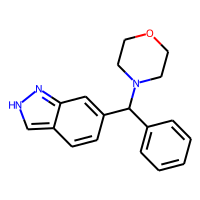
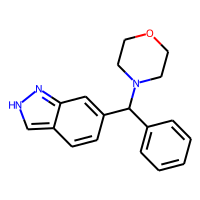
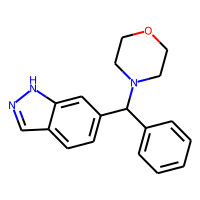
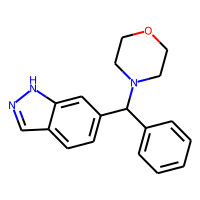
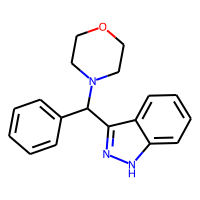
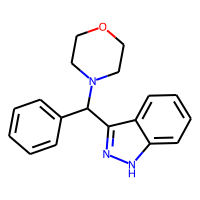
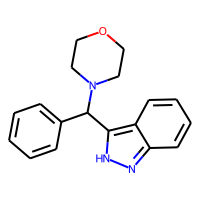
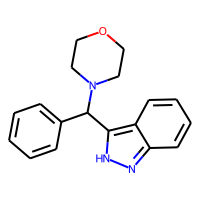
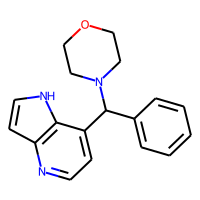
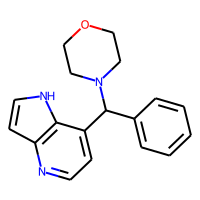
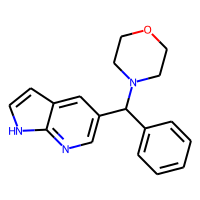
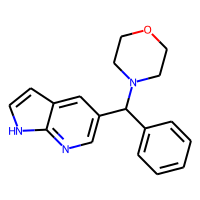
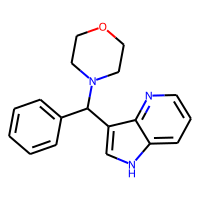
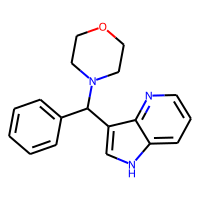
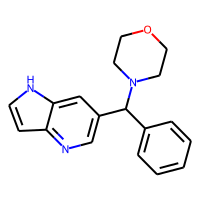
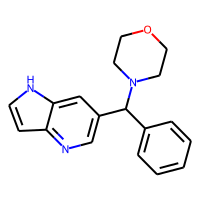
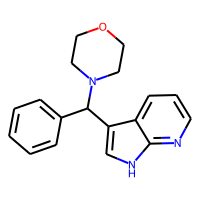
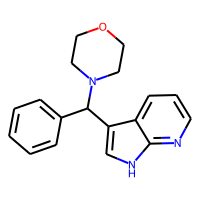
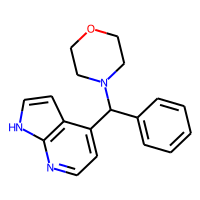
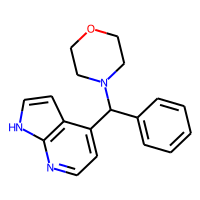
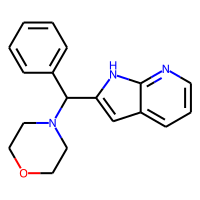
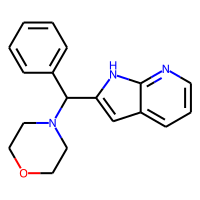
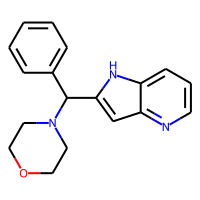
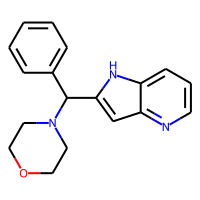
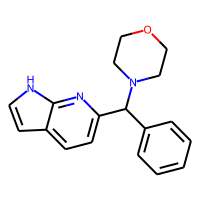
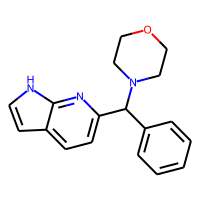
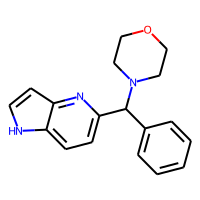
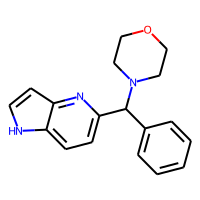
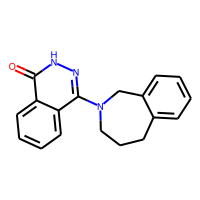
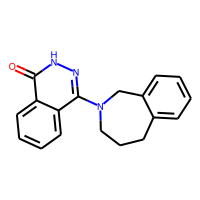
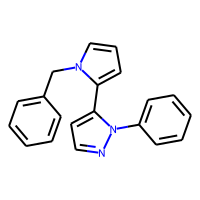
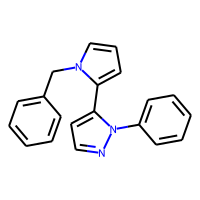
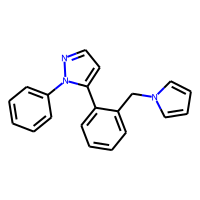
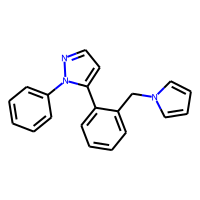
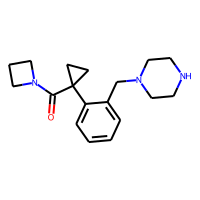
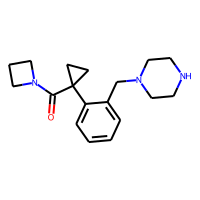
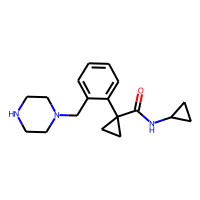
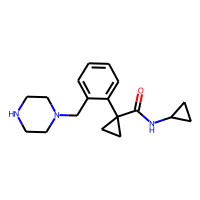
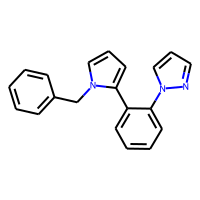
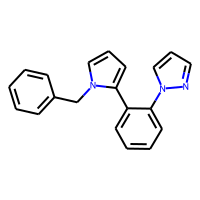
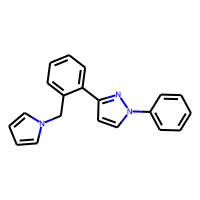
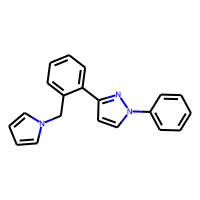
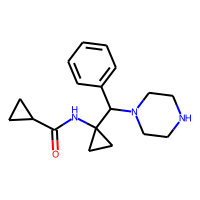
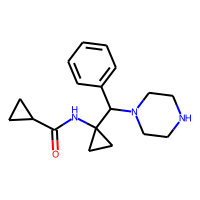
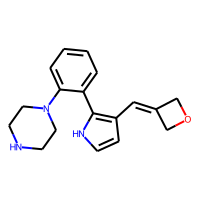
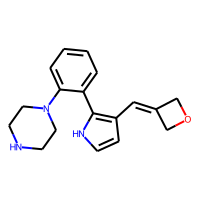
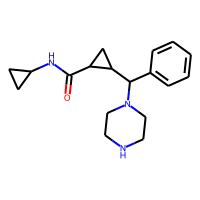
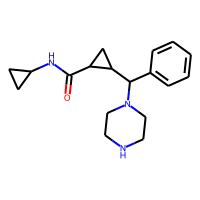
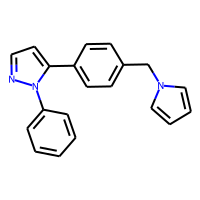
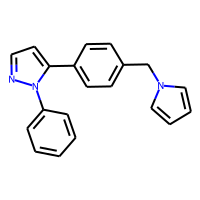
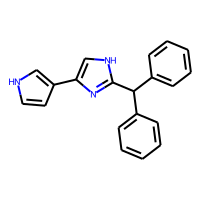
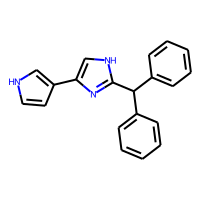
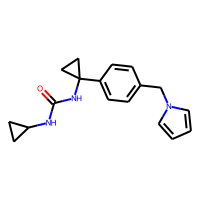
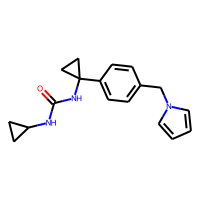
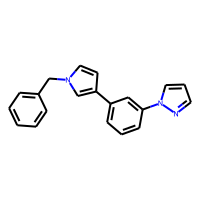
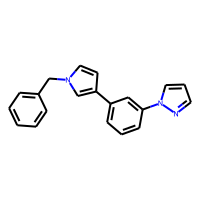
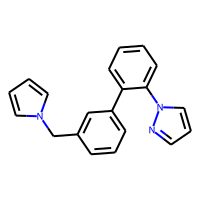
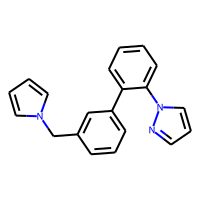
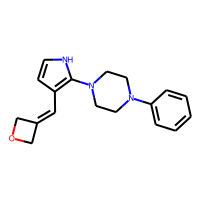
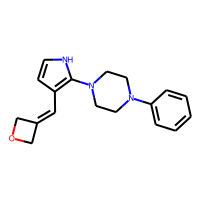
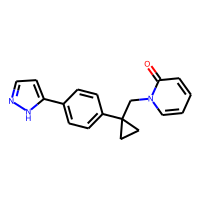
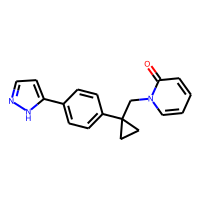
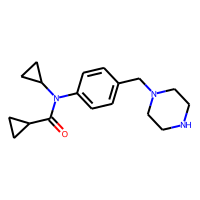
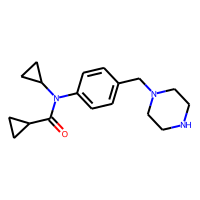
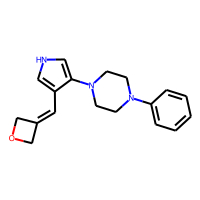
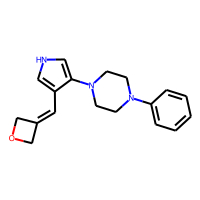
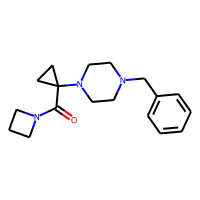
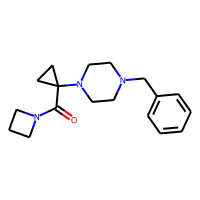
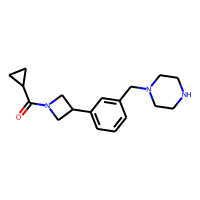
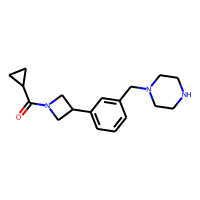
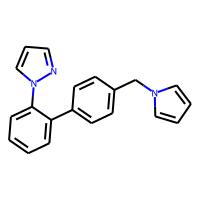
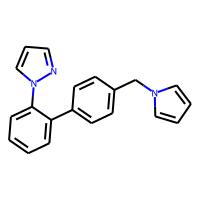
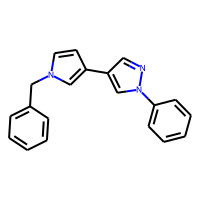
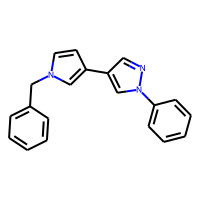
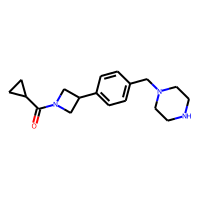
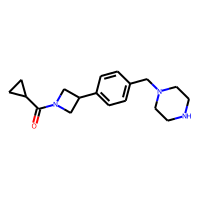
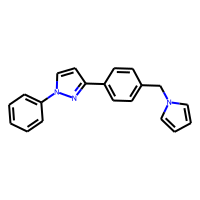
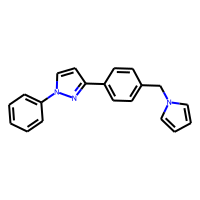
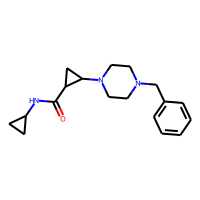
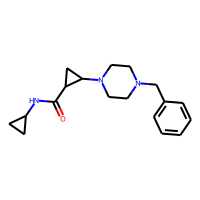
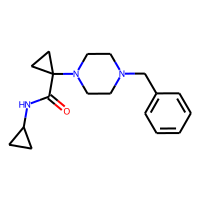
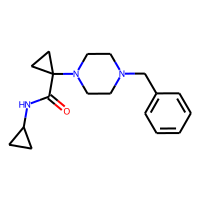
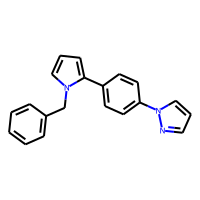
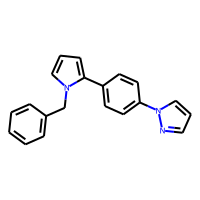
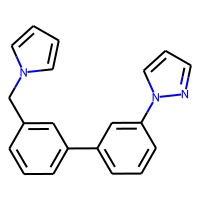
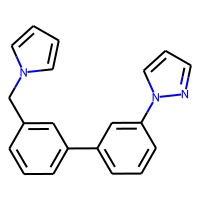
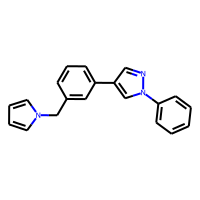
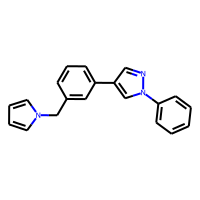
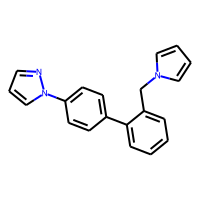
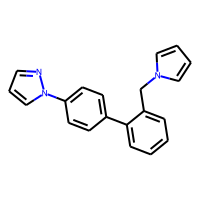
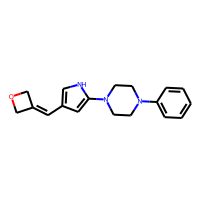
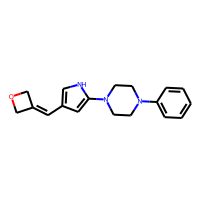
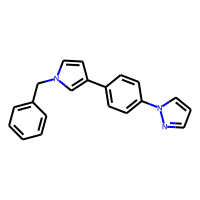
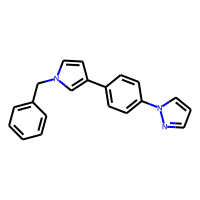
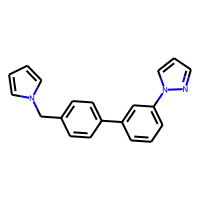
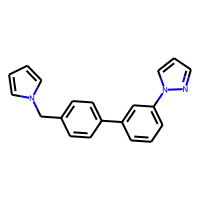
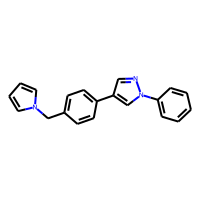
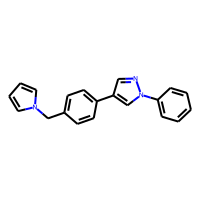
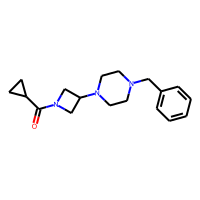
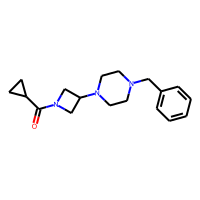
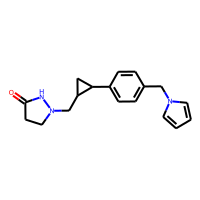
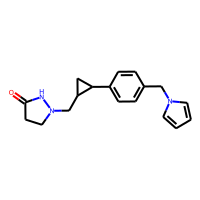
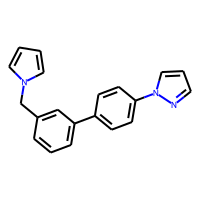
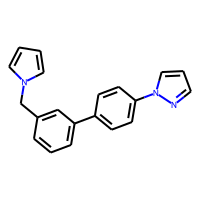
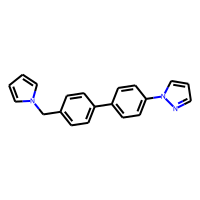
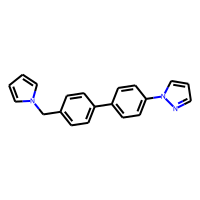
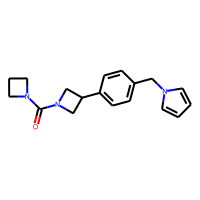
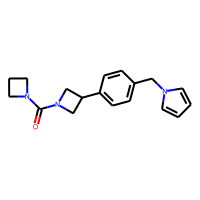

In [79]:
data_small.sort_values(['Tanimoto_sim_toFirst'], inplace=False, ascending=False)

## Descriptors

![desc](./de_list.png)

In [80]:
from rdkit.Chem import Descriptors
print("TPSA %s"%Descriptors.TPSA(my_this_mol_obj))
print("mollogP %s"%Descriptors.MolLogP(my_this_mol_obj))

TPSA 44.370000000000005
mollogP 1.6070999999999998


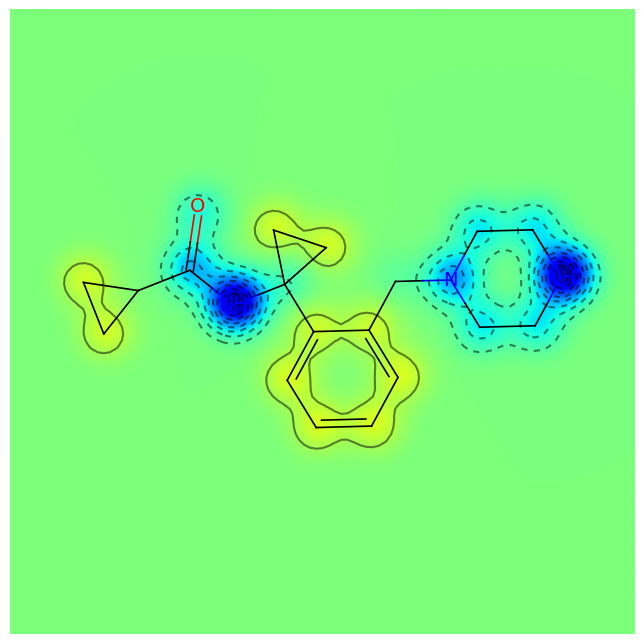

In [81]:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(my_this_mol_obj)
fig = SimilarityMaps.GetSimilarityMapFromWeights(my_this_mol_obj,[x for x,y in contribs], colorMap='jet', contourLines=10)


In [ ]:
# how to calculate them all

In [82]:

from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
nms=[x[0] for x in Descriptors._descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(nms)
print(len(nms))

208


In [83]:
my_precious_descs = [calc.CalcDescriptors(x) for x in [my_this_mol_obj,my_that_mol_obj]]
my_precious_descs

[(12.205777415726008,
  -0.06517514644746791,
  12.205777415726008,
  0.06517514644746791,
  0.8680055370154803,
  299.418,
  274.21799999999996,
  299.19976242,
  118,
  0,
  0.22330375351865475,
  -0.3463346892647897,
  0.3463346892647897,
  0.22330375351865475,
  1.2272727272727273,
  1.9545454545454546,
  2.6363636363636362,
  16.150795630774944,
  9.969595050229204,
  2.481360516755883,
  -2.292166987678432,
  2.475769372723654,
  -2.431885103376,
  5.819142241297038,
  -0.12287662495525413,
  1.5163244697498834,
  557.2056255257703,
  14.993353063746348,
  13.106174262590882,
  13.106174262590882,
  10.767586856405696,
  8.603096380960979,
  8.603096380960979,
  7.028926172518167,
  7.028926172518167,
  5.197118641352526,
  5.197118641352526,
  3.5052910202586887,
  3.5052910202586887,
  -1.3900000000000001,
  352102.8301768506,
  14.218088231732617,
  5.669792189703553,
  2.900017633206688,
  131.8142951691318,
  10.633577208012662,
  0.0,
  0.0,
  5.907179729351506,
  0.0,
  0.

In [84]:
np.array(my_precious_descs).shape

(2, 208)

In [85]:
from sklearn.metrics import euclidean_distances
euclidean_distances(np.array(my_precious_descs))

array([[    0.        , 96798.23610367],
       [96798.23610367,     0.        ]])

For realworld data for descriptor calculation one of the most common used library is [Mordred Descriptors](https://github.com/mordred-descriptor/mordred) (~ 1500 descriptors)

## Substructure search

In [86]:
benzo_six = Chem.MolFromSmarts('[*r6R1]1[cR2]2[cR1][cR1][cR1][cR1][cR2]2[*r6R1][*r6R1][*r6R1]1')

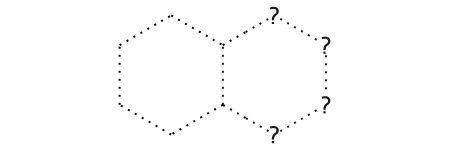

In [87]:
benzo_six

,ROMol
187028,
187029,

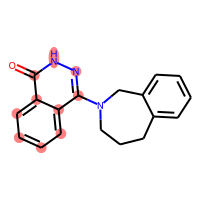
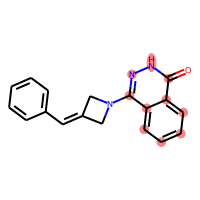

In [88]:
data_small[data_small['ROMol'] >= benzo_six][['ROMol']]

In [89]:
data_small["ROMol"].apply(lambda x: x.HasSubstructMatch(benzo_six) )

187001    False
187002    False
187003    False
187004    False
187005    False
          ...  
187096    False
187097    False
187098    False
187099    False
187100    False
Name: ROMol, Length: 100, dtype: bool

In [90]:
data_small["HasBenzoSix"]=data_small["ROMol"].apply(lambda x: x.HasSubstructMatch(benzo_six) )

/home/eleni/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


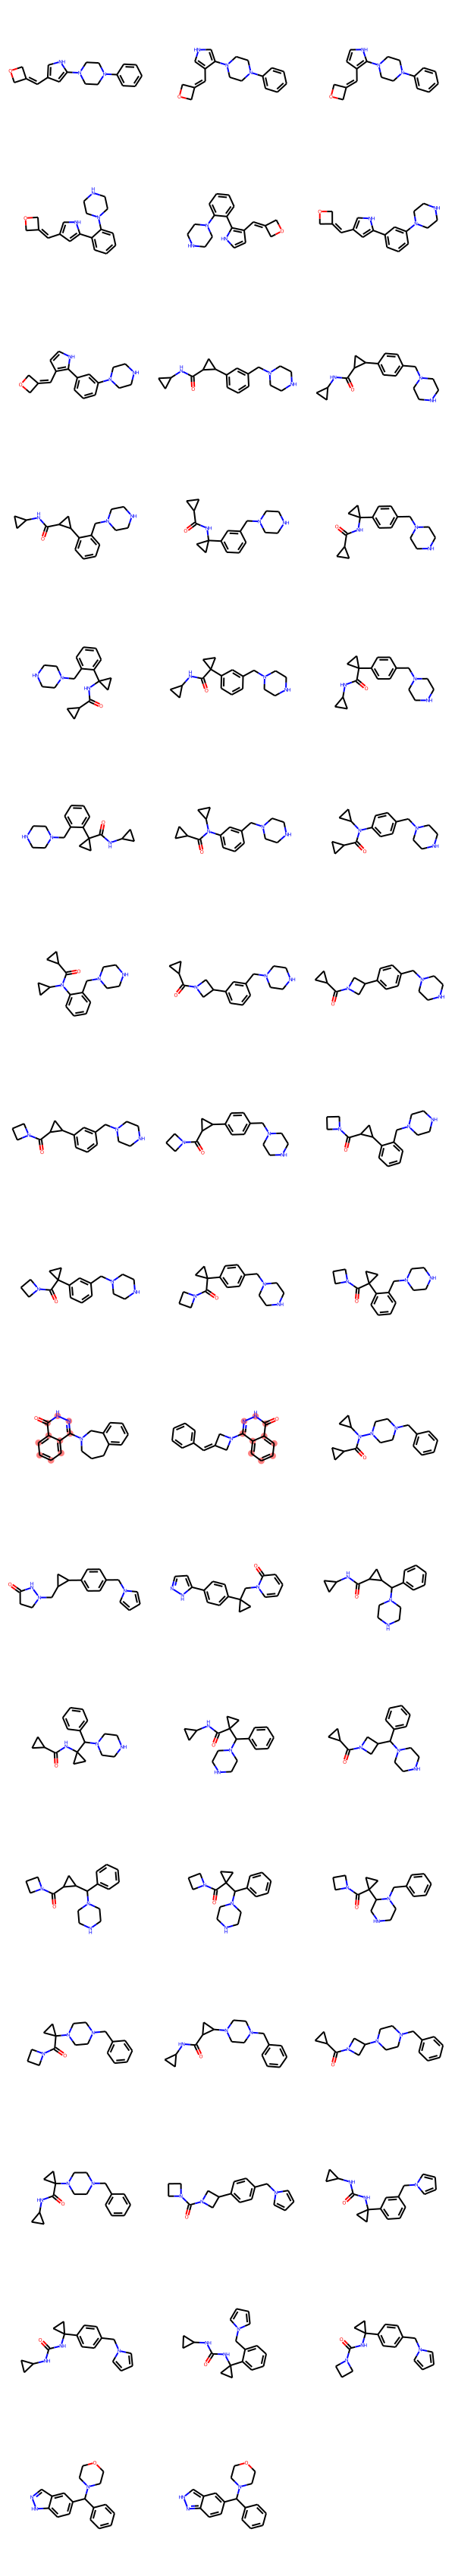

In [91]:

highlight_lists = [mol.GetSubstructMatch(benzo_six) for mol in data_small["ROMol"].to_list()]
Draw.MolsToGridImage(data_small["ROMol"].to_list(), 
                     highlightAtomLists = highlight_lists,
                     useSVG=False
                    )

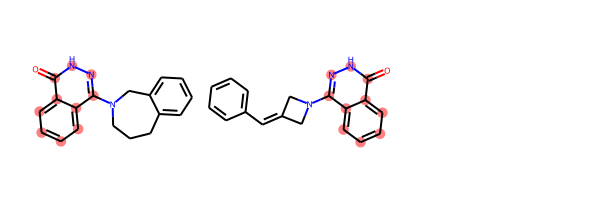

In [92]:
highlight_lists = [mol.GetSubstructMatch(benzo_six) for mol in data_small[data_small["HasBenzoSix"]]["ROMol"].to_list()]
Draw.MolsToGridImage(data_small[data_small["HasBenzoSix"]]["ROMol"].to_list(), 
                     highlightAtomLists = highlight_lists,
                     useSVG=False
                    )

In [93]:
AllChem.Compute2DCoords(benzo_six)

0

In [94]:
for mol in data_small[data_small["HasBenzoSix"]]["ROMol"].to_list():
    AllChem.GenerateDepictionMatching2DStructure(mol, benzo_six, acceptFailure = True)

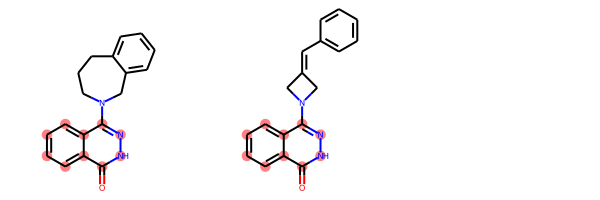

In [95]:
highlight_lists = [mol.GetSubstructMatch(benzo_six) for mol in data_small[data_small["HasBenzoSix"]]["ROMol"].to_list()]
Draw.MolsToGridImage(data_small[data_small["HasBenzoSix"]]["ROMol"].to_list(), 
                     highlightAtomLists = highlight_lists,
                     useSVG=False
                    )

## Murko scaffolds

In [96]:
from rdkit.Chem.Scaffolds import MurckoScaffold
core = MurckoScaffold.GetScaffoldForMol(my_this_mol_obj)

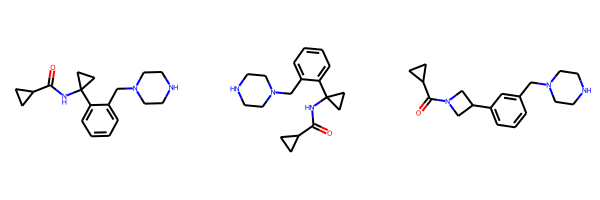

In [97]:
Draw.MolsToGridImage([core,my_this_mol_obj,my_that_mol_obj])

In [98]:
fw = MurckoScaffold.MakeScaffoldGeneric(core)
Chem.MolToSmiles(fw)


'CC(CC1(C2CCCCC2CC2CCCCC2)CC1)C1CC1'

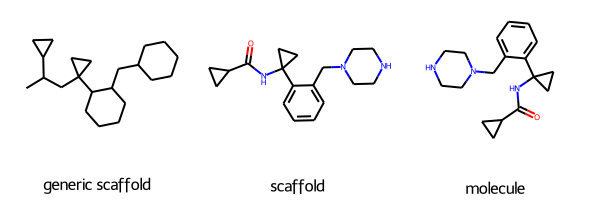

In [99]:
Draw.MolsToGridImage([fw,core,my_this_mol_obj],legends=["generic scaffold","scaffold","molecule"])

In [100]:
AllChem.Compute2DCoords(core)


0

In [101]:
for m in [core,my_this_mol_obj]:
    AllChem.GenerateDepictionMatching2DStructure(m,core)

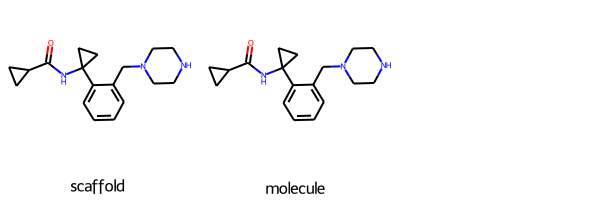

In [102]:
Draw.MolsToGridImage([core,my_this_mol_obj],legends=["scaffold","molecule"])